In [13]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [4]:
MVP_frame = pd.read_pickle("data/MVP_data.pickle")
MVP_frame

,address,zip code,unit,rent,rooms,beds,baths,studio,link
0,570 Nostrand Avenue,11216,#6E,"$2,375",2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
1,570 Nostrand Avenue,11216,#5E,"$2,350",2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
2,570 Nostrand Avenue,11216,#4E,"$2,350",2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
3,570 Nostrand Avenue,11216,#6B,"$3,100",3.0,2.0,2.0,0,https://streeteasy.com/building/570-nostrand-a...
4,570 Nostrand Avenue,11216,#6D,"$3,200",3.0,2.0,2.0,0,https://streeteasy.com/building/570-nostrand-a...
...,...,...,...,...,...,...,...,...,...
105,439 Knickerbocker Avenue,11237,#3D,"$2,200",5.0,2.0,1.0,0,https://streeteasy.com/building/439-knickerboc...
106,One South First 1 South 1st Street,11249,#34N,"$3,625",2.0,0.0,1.0,1,https://streeteasy.com/building/one-south-firs...
107,573 East 22nd Street,11226,#GARDEN,"$2,745",8.0,4.0,1.5,0,https://streeteasy.com/building/573-east-22-st...
108,429 43rd Street,11232,#2F,"$2,500",6.0,3.0,2.0,0,https://streeteasy.com/building/429-43-street-...


In [9]:
MVP_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   address   110 non-null    object 
 1   zip code  110 non-null    int64  
 2   unit      110 non-null    object 
 3   rent      110 non-null    object 
 4   rooms     110 non-null    float64
 5   beds      110 non-null    float64
 6   baths     110 non-null    float64
 7   studio    110 non-null    int64  
 8   link      110 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 7.9+ KB


In [12]:
MVP_frame.rename(columns = {"rent" : "rent($)"}, inplace = True)
MVP_frame.head()

,address,zip code,unit,rent($),rooms,beds,baths,studio,link
0,570 Nostrand Avenue,11216,#6E,"$2,375",2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
1,570 Nostrand Avenue,11216,#5E,"$2,350",2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
2,570 Nostrand Avenue,11216,#4E,"$2,350",2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
3,570 Nostrand Avenue,11216,#6B,"$3,100",3.0,2.0,2.0,0,https://streeteasy.com/building/570-nostrand-a...
4,570 Nostrand Avenue,11216,#6D,"$3,200",3.0,2.0,2.0,0,https://streeteasy.com/building/570-nostrand-a...


In [15]:
MVP_frame[MVP_frame.columns[3]] = MVP_frame[MVP_frame.columns[3]].replace('[\$,]', '', regex=True).astype(int)
MVP_frame.head()

,address,zip code,unit,rent($),rooms,beds,baths,studio,link
0,570 Nostrand Avenue,11216,#6E,2375,2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
1,570 Nostrand Avenue,11216,#5E,2350,2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
2,570 Nostrand Avenue,11216,#4E,2350,2.0,1.0,1.0,0,https://streeteasy.com/building/570-nostrand-a...
3,570 Nostrand Avenue,11216,#6B,3100,3.0,2.0,2.0,0,https://streeteasy.com/building/570-nostrand-a...
4,570 Nostrand Avenue,11216,#6D,3200,3.0,2.0,2.0,0,https://streeteasy.com/building/570-nostrand-a...


In [16]:
MVP_frame.corr()

,zip code,rent($),rooms,beds,baths,studio
zip code,1.000000,0.082443,0.081219,0.080250,-0.102118,0.047760
rent($),0.082443,1.000000,0.312272,0.541796,0.527411,-0.243412
rooms,0.081219,0.312272,1.000000,0.797557,0.332267,-0.392620
beds,0.080250,0.541796,0.797557,1.000000,0.486881,-0.456673
baths,-0.102118,0.527411,0.332267,0.486881,1.000000,-0.131842
studio,0.047760,-0.243412,-0.392620,-0.456673,-0.131842,1.000000


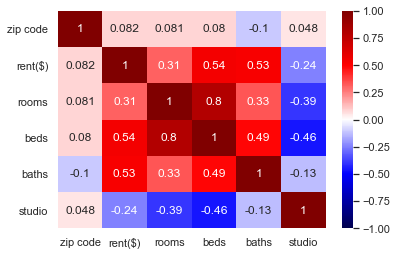

In [17]:
sns.heatmap(MVP_frame.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Overall as expected; pretty strong correlation between number of rooms and rent, negatively so if there's a studio, and ZIP code is a pretty weak correlation.

One issue is the high multicolinearity of rooms and beds. May want to remove rooms for the final model.

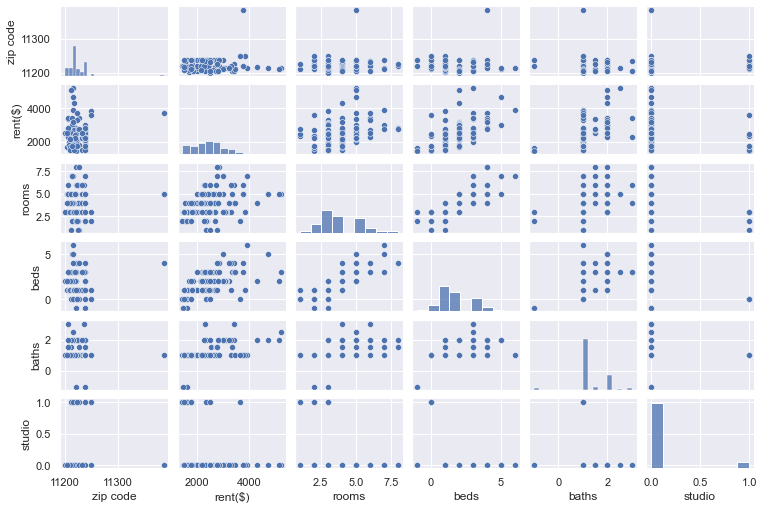

In [18]:
sns.pairplot(MVP_frame, height=1.2, aspect=1.5);

In [19]:
df = MVP_frame

In [10]:
features, target = ["rooms", "beds", "baths", "studio"], "rent"
X, y = MVP_frame[features], MVP_frame[target]
lm = LinearRegression()
lm.fit(X, y)

ValueError: could not convert string to float: '$2,375'